In [234]:
!pip install ExKMC
!pip install adjustText

In [235]:
from ExKMC.Tree import Tree
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from adjustText import adjust_text

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
# Create dataset
# n = 100
# d = 10
# k = 3
# X, _ = make_blobs(n, d, k, cluster_std=3.0)

# # Initialize tree with up to 6 leaves, predicting 3 clusters
# tree = Tree(k=k, max_leaves=2*k) 

# # Construct the tree, and return cluster labels
# prediction = tree.fit_predict(X)

# # Tree plot saved to filename
# tree.plot('filename')

In [236]:
data = pd.read_excel('variablesClasificacionFRE.xlsx', na_values='-')

data['Departamento.1'] = data['Departamento.1'].str.title()

In [237]:
data.head(3)

,Departamento,Departamento.1,Presupuesto_2020,Presupuesto_Salud_2020,Prop_productosCD_2021,Cumplimiento_A1_2020-2021-06,Cumplimiento_A2_2020-2021-06,PropPortafolio,No_Inscritos,T_adq_Recet
0,22,Amazonas,195000000000,3.892668e+10,1.00000,0.75,0.833333,0.529412,6.0,15.000000
1,3,Antioquia,2714000000000,9.783884e+11,0.96165,1.00,1.000000,1.000000,1054.0,0.081818
2,25,Arauca,257000000000,5.174802e+10,1.00000,1.00,0.888889,0.882353,19.0,1.800000


In [238]:
columns = ['Presupuesto_2020', 'Presupuesto_Salud_2020', 
             'No_Inscritos', 'Prop_productosCD_2021', 
             'Cumplimiento_A1_2020-2021-06', 'Cumplimiento_A2_2020-2021-06', 
             'PropPortafolio', 'T_adq_Recet', 'Departamento.1']

X = data.loc[:, columns]
X.set_index('Departamento.1', inplace=True)
X.dropna(inplace=True)
X.head(3)

,Presupuesto_2020,Presupuesto_Salud_2020,No_Inscritos,Prop_productosCD_2021,Cumplimiento_A1_2020-2021-06,Cumplimiento_A2_2020-2021-06,PropPortafolio,T_adq_Recet
Departamento.1,,,,,,,,
Amazonas,195000000000,3.892668e+10,6.0,1.00000,0.75,0.833333,0.529412,15.000000
Antioquia,2714000000000,9.783884e+11,1054.0,0.96165,1.00,1.000000,1.000000,0.081818
Arauca,257000000000,5.174802e+10,19.0,1.00000,1.00,0.888889,0.882353,1.800000


In [239]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X)

In [240]:
np.shape(X_train)

(31, 8)

In [241]:
## Evaluación de número k
k_list = np.arange(1, 31)
leaves_list = np.arange(1, 50)

lv_list1 = list()
lv_list2 = list()

for lv in tqdm.tqdm(leaves_list):
  score_list1 = list()
  score_list2 = list()
  
  for i in k_list:
    tree = Tree(k = i, max_leaves = 2 * i)
    prediction = tree.fit_predict(X_train)
    score_list1.append(tree.score(X_train))
    score_list2.append(tree.surrogate_score(X_train))
  
  lv_list1.append(score_list1)
  lv_list2.append(score_list2)

100%|██████████| 49/49 [00:23<00:00,  2.07it/s]


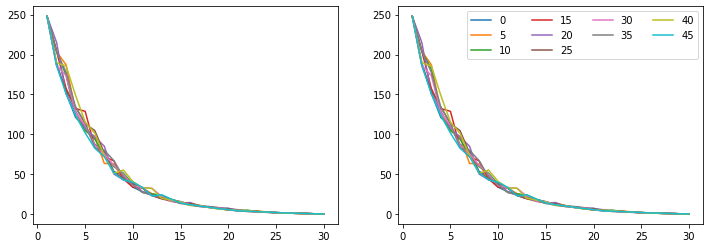

In [242]:
fig, ax = plt.subplots(1,2, figsize = (12, 4))

for j, _ in enumerate(leaves_list):
  if j % 5 == 0:
    ax[0].plot(k_list, lv_list1[j], label = j)
for j, _ in enumerate(leaves_list):
  if j % 5 == 0:
    ax[1].plot(k_list, lv_list2[j], label = j)

ax[1].legend(ncol = 4)

In [243]:
k = 3
tree = Tree(k=k, max_leaves=2*k) 
# Construct the tree, and return cluster labels
prediction = tree.fit_predict(X_train)

In [244]:
prediction

array([1., 2., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.])

In [245]:
tree.plot('filename', feature_names=columns)

In [246]:
tree.score(X_train)

151.60384474637186

In [247]:
k = 8
tree = Tree(k=k, max_leaves=2*k) 
# Construct the tree, and return cluster labels
prediction = tree.fit_predict(X_train)
prediction

array([7., 3., 2., 4., 5., 2., 4., 2., 1., 2., 4., 2., 5., 7., 2., 7., 2.,
       1., 7., 0., 2., 0., 2., 4., 6., 4., 0., 4., 4., 6., 6.])

In [248]:
tree.plot('graficos_k8', feature_names=columns)

In [249]:
X.columns

Index(['Presupuesto_2020', 'Presupuesto_Salud_2020', 'No_Inscritos',
       'Prop_productosCD_2021', 'Cumplimiento_A1_2020-2021-06',
       'Cumplimiento_A2_2020-2021-06', 'PropPortafolio', 'T_adq_Recet'],
      dtype='object')

In [250]:
# X

umb_data = [[-1.194, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
            [+2.065, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
            [np.NaN, np.NaN, -0.741, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
            [np.NaN, np.NaN, -0.727, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
            [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, -0.280],
            [np.NaN, np.NaN, np.NaN, -1.487, np.NaN, np.NaN, np.NaN, np.NaN],
            [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 0.548, np.NaN],
            [np.NaN, np.NaN, np.NaN, np.NaN, -3.383, np.NaN, np.NaN, np.NaN],
            [np.NaN, -0.237, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]]

pd.DataFrame(
    np.transpose(scaler.inverse_transform(umb_data)), 
    columns = columns
)

,Presupuesto_2020,Presupuesto_Salud_2020,No_Inscritos,Prop_productosCD_2021,Cumplimiento_A1_2020-2021-06,Cumplimiento_A2_2020-2021-06,PropPortafolio,T_adq_Recet,Departamento.1
0,1.021243e+11,2.005818e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.224525e+10
2,NaN,NaN,3.033913,5.986735,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.408753,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750006,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.941173,NaN,NaN
7,NaN,NaN,NaN,NaN,3.001833,NaN,NaN,NaN,NaN


In [251]:
from sklearn.decomposition import PCA

In [252]:
pca = PCA(random_state=2021)
pca.fit(X_train)
print(pca.explained_variance_ratio_)

[0.3919343  0.17741867 0.1231828  0.11761585 0.09167238 0.0736223
 0.0168361  0.00771761]


In [253]:
[i/sum(pca.explained_variance_ratio_) for i in pca.explained_variance_ratio_]

[0.3919342961510144,
 0.1774186681885638,
 0.12318280005622713,
 0.11761584619506824,
 0.0916723817527774,
 0.07362229548013303,
 0.01683610289895436,
 0.007717609277261776]

In [254]:
pca_train = pca.fit_transform(X_train)

np.shape(pca_train)

(31, 8)

In [255]:
pca_train1 = pd.DataFrame(pca_train, columns=None)
pca_train1.columns = ["PC{}".format(i+1) for i in range(8)]
pca_train1['Depto1'] = X.index
pca_train1['grupo'] = prediction

In [256]:
import pickle

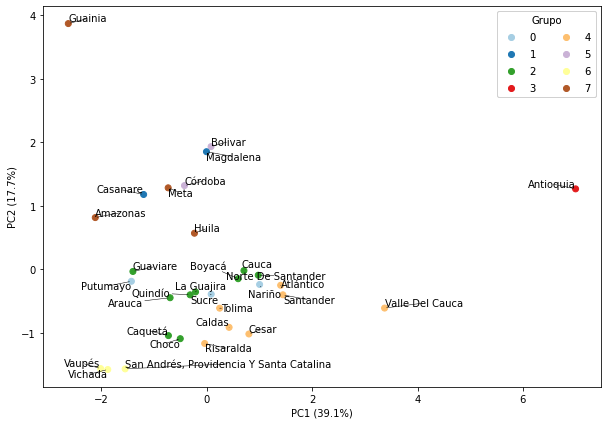

In [257]:
fig, ax = plt.subplots(1,1, figsize = (10,7))

grupos = [int(i) for i in pca_train1.grupo]

scatter = ax.scatter(pca_train[:, 0], pca_train[:, 1], c = grupos, 
           cmap='Paired')

texts = []
for i, label in enumerate(pca_train1['Depto1']):
  texts.append(ax.annotate(label, (pca_train[i,0], pca_train[i,1])))

adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

ax.set_xlabel('PC1 (39.1%)')
ax.set_ylabel('PC2 (17.7%)')
# ax.legend(grupos, [str(i) for i in grupos], loc = 'upper right', ncol = 2)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Grupo", ncol = 2)
ax.add_artist(legend1)

plt.savefig('030_analisisCluster.pdf')
pickle.dump(fig, open('030_analisisCluster.pkl', 'wb'))  
#
# 

In [261]:
pca_train1.to_csv('030_analisisCluster.csv', index = False)